In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### The goal of this notebook is to get value counts for each landmark. We pre-selected 40 landmarks that we want to train our model with. We later found out that even though some of these are famous landmarks, there are not a lot of images for some, or they are under multiple names. Since finding each and every label for our desired landmarks is a lot of work that we might not be able to do with the given time. After looking at our desired landmarks, we looked at the most common landmark ID's and ordered them by count. 

In [2]:
index_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\index_image_to_landmark.csv")
landmark_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\landmark_id_dictionary.csv")

In [3]:
id_list = landmark_df['ID'].tolist()   # Getting a list of ID's that we will look for
print(id_list)

[40333, 43757, 43267, 57570, 30675, 24996, 73248, 83439, 13542, 58504, 85575, 48268, 10924, 43412, 77972, 44418, 14790, 83923, 80307, 82091, 39351, 38652, 34274, 71671, 64537, 91294, 33271, 72649, 85433, 77887, 31913, 65436, 108502]


In [4]:
filtered_df = index_df.loc[index_df['landmark_id'].isin(id_list)]   # Taking only images that we are interested in
filtered_df['landmark_id'].unique()    # There are some values in id_list that aren't here. 

array([43412, 39351, 38652, 64537, 72649, 65436, 80307, 58504, 30675,
       40333, 48268, 44418, 33271, 14790, 82091, 83439, 13542, 10924,
       91294, 24996, 85575, 43757, 77972, 85433, 73248, 77887, 43267,
       34274, 57570, 83923, 31913, 71671], dtype=int64)

In [5]:
print(len(filtered_df))    # We have 909 values to train our model.

909


In [6]:
merged_df = filtered_df.merge(landmark_df, left_on='landmark_id', right_on='ID', how='left')   # Finalizing the dataframe
merged_df = merged_df.drop(columns=['ID'])
merged_df.head()

,id,landmark_id,Landmark
0,9bc1d25ff3afa8af,43412,Golden Gate Bridge
1,8d9ebf1e1c05cb42,39351,The Rotunda
2,14eb43d406fbefbf,39351,The Rotunda
3,6180b3f33195d353,38652,Lincoln Financial Field
4,3ccfd45e321f6b26,64537,Monticello


<Axes: title={'center': 'Counts of each Landmark'}, xlabel='Landmark', ylabel='Count'>

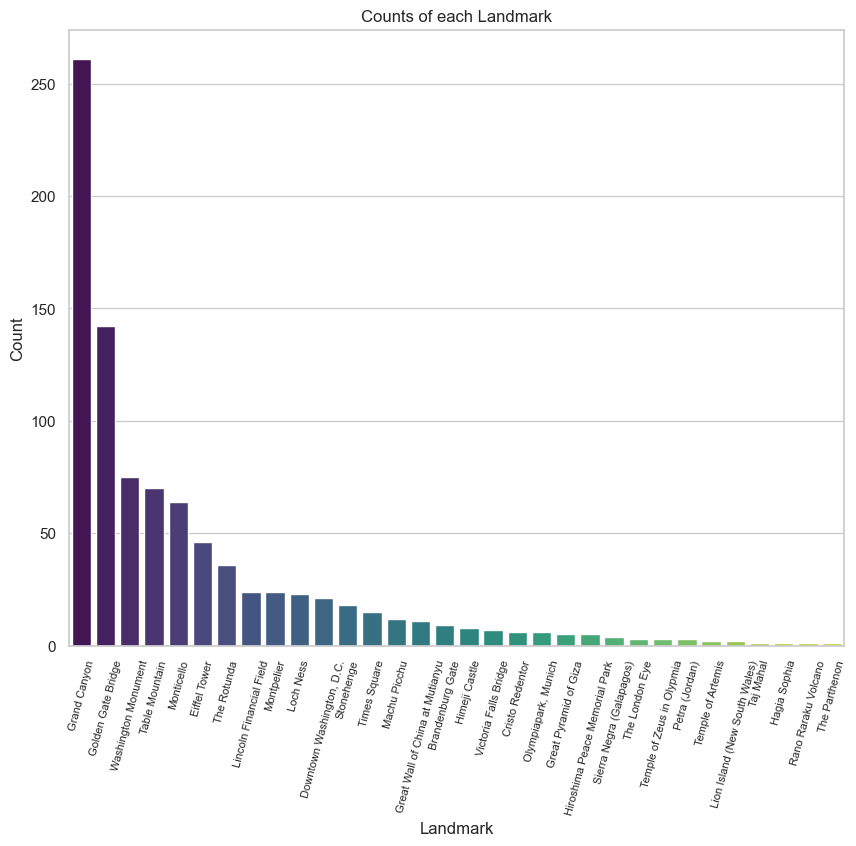

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="whitegrid")
plt.xticks(fontsize = 8, rotation=75)
plt.title("Counts of each Landmark")
landmark_counts = merged_df['Landmark'].value_counts().reset_index()
landmark_counts.columns = ['Landmark', 'Count']

sns.barplot(x='Landmark', y='Count', data=landmark_counts, palette='viridis')

In [8]:
merged_df.to_csv('select_landmarks.csv')

### Looking at these results, we might want to look at other landmarks that have more images. Lets see which laandmarks have the most images.

In [9]:
label_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\index_label_to_category.csv")

In [10]:
complete_df = label_df.merge(index_df, left_on='landmark_id', right_on='landmark_id', how='left')
complete_df['landmark_name'] = complete_df['category'].str.split(':').str[2]    # Taking the landmark name from the string
complete_df = complete_df.drop(columns=['category'])
complete_df.head()

,landmark_id,id,landmark_name
0,0,c2e249213cf1bc97,Seal_Bay_Conservation_Park
1,0,9428422f9abc287f,Seal_Bay_Conservation_Park
2,0,23dfad7ecd53a18f,Seal_Bay_Conservation_Park
3,1,08c02ab74c07843f,Frances_M._MacKay_House
4,1,40eb1875117e3a33,Frances_M._MacKay_House


In [11]:
complete_counts = complete_df['landmark_id'].value_counts().reset_index(name='count')
complete_counts = complete_counts.merge(complete_df, left_on='index', right_on='landmark_id', how='left')
complete_counts = complete_counts.drop_duplicates(subset=['index'])

complete_counts = complete_counts.drop(columns=['index','id'])
complete_counts = complete_counts.reset_index(drop=True)

complete_counts.head()

,count,landmark_id,landmark_name
0,8695,78775,Marine_Corps_Base_Camp_Pendleton
1,3779,93036,Naval_Station_Guantanamo_Bay
2,3705,4782,Bayerische_Staatsgem%C3%A4ldesammlungen
3,2986,91437,"Fort_Hood,_Texas"
4,2696,97365,Fernald_Feed_Materials_Production_Center


In [12]:
top1000 = complete_counts.head(1000)

In [13]:
top1000.to_csv('top1000.csv')  # Saving the top 1000 landmarks, ordered by count

<Axes: title={'center': 'Counts of Landmarks (Top 30)'}, xlabel='landmark_name', ylabel='count'>

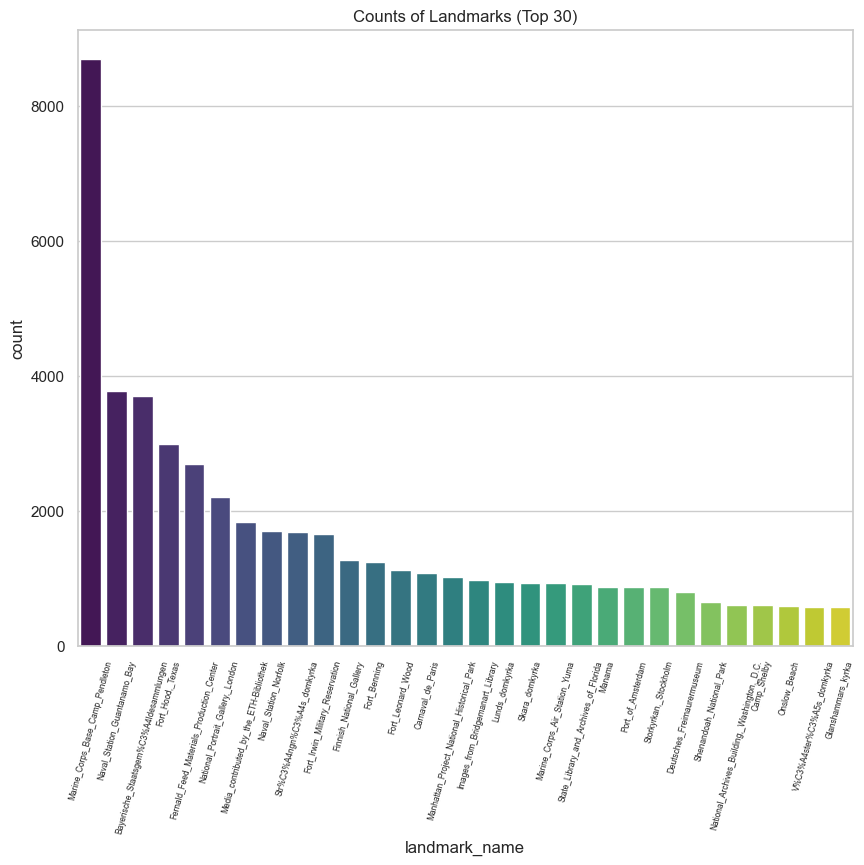

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="whitegrid")
plt.xticks(fontsize = 6, rotation=75)
plt.title("Counts of Landmarks (Top 30)")


sns.barplot(x='landmark_name', y='count', data=complete_counts.head(30), palette='viridis')